# FEP example on harmonic oscillator

In this notebook, we show how we can parameterize the potential energies of two harmonic oscillators using lambda, such that we create sufficient phase-space overlap to transition from one bond to another.

Here, the system is propogated by varying the distance between the two beads in the bond, and the bond strength and length are given by the two force constants in harmonic oscillator.

Coincidentally, this harmonic oscillator represents an O-H and C-O bond in the OPLS forcefield, it's exact parameters were obtained from a reference forcefield file.

Note that here we simulate the potential energy of the system as a function of the distance between the atoms, and not by introducing timesteps. Since we have few degrees of freedom, we can easily simulate the system like this, but of course for (much more) complex systems we either use Molecular Dynamics or Monte Carlo simulations.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Define a simple harmonic oscilator
def HarmonicOscillator(r, Kb, r0):
    Upot = 0.5 * Kb * (r - r0)**2
    return Upot

# Calculate the potential energies when we couple the two harmonic oscillators via a scaling factor lambda (l)
def HarmonicOscillatorFEP(r, Kb_i, r0_i, Kb_j, r0_j, l):
    Upot = (1-l) * HarmonicOscillator(r, Kb_i, r0_i) + l * HarmonicOscillator(r, Kb_j, r0_j)
    return Upot

In [13]:
# 100 linearly spaced numbers
r = np.linspace(0.5,1.8,100)

# force constants
# H270   O268    1106.000     0.945  
Kb_i = 1106.0 # in kcal/mol
r0_i = 0.945  # in Å

# C267   O268     900.000     1.364  
Kb_j = 900.0 # in kcal/mol
r0_j = 1.364  # in Å

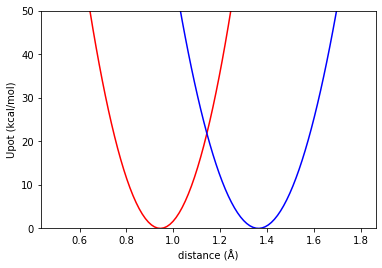

In [14]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([0, 50])
ax.set_xlabel('distance (Å)')
ax.set_ylabel('Upot (kcal/mol)')

#for l in np.linspace(0,1,50):
#    plt.plot(r,HarmonicOscillatorFEP(r, Kb_i, r0_i,Kb_j, r0_j,l), '0.8')

plt.plot(r,HarmonicOscillator(r, Kb_i, r0_i), 'r')
plt.plot(r,HarmonicOscillator(r, Kb_j, r0_j), 'b')

# show the plot
plt.show()

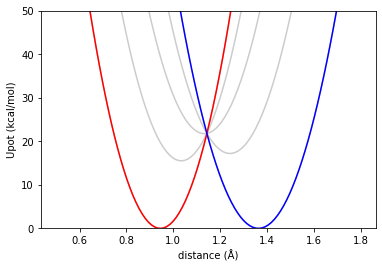

In [15]:
# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim([0, 50])
ax.set_xlabel('distance (Å)')
ax.set_ylabel('Upot (kcal/mol)')

# Define lambda (l) as equally distributed values in the range of 0 to 1.
# Calculate the potential energy landscape for each of the individual windows
for l in np.linspace(0,1,5):
    plt.plot(r,HarmonicOscillatorFEP(r, Kb_i, r0_i,Kb_j, r0_j,l), '0.8')
    
# Plot the original landscapes for reference 
plt.plot(r,HarmonicOscillator(r, Kb_i, r0_i), 'r')
plt.plot(r,HarmonicOscillator(r, Kb_j, r0_j), 'b')
# show the plot
plt.show()